# DATA SCRAPPING

In [ ]:
!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00


In [ ]:
# POST 1
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
url = 'https://www.reddit.com/r/memes/comments/181mkbn/the_duality_of_japan/?share_id=NUtCIQPkvD2_I3LWUhk8q&utm_content=2&utm_medium=android_app&utm_name=androidcss&utm_source=share&utm_term=3'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(200)
comments = driver.find_elements(By.XPATH, '//*[@id="-post-rtjson-content"]')
i=0
lis = []
for comment in comments:
    comment_text = comment.text
    i=i+1
    lis.append(comment_text)
    print(i,comment_text)
driver.quit()

In [ ]:
#POST 2
url = 'https://www.reddit.com/r/Conservative/comments/16u1ws9/debate_discussion_thread_open/?share_id=1o4cKBGc-c2O8r6kP5RPu&utm_content=2&utm_medium=android_app&utm_name=androidcss&utm_source=share&utm_term=3'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(200)

comments1 = driver.find_elements(By.XPATH, '//*[@id="-post-rtjson-content"]')
i=0
lis = []
for comment in comments1:
    comment_text = comment.text
    i=i+1
    lis.append(comment_text)
    print(i,comment_text)
driver.quit()

In [ ]:
#POST 3
url = 'https://www.reddit.com/r/Damnthatsinteresting/comments/181zryk/a_prison_in_el_salvador_a_country_once_known_for/?share_id=RVKuDb2_7Z2T0UYipe3DU&utm_content=2&utm_medium=android_app&utm_name=androidcss&utm_source=share&utm_term=3'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(200)
comments1 = driver.find_elements(By.XPATH, '//*[@id="-post-rtjson-content"]')
i=0
lis = []
for comment in comments1:
    comment_text = comment.text
    i=i+1
    lis.append(comment_text)
    print(i,comment_text)

driver.quit()

# DATA PREPROCESSING


In [ ]:
!pip install nltk
!pip install contractions
import nltk
import contractions
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("Comments3.csv")
df.drop('Unnamed: 0' ,axis =1 ,inplace = True)
df = df.astype(str)
df.head()

,Comments
0,The first time I got a blast of warm water up ...
1,Wait bidets are warm water? Thats a relief. On...
2,The US still uses fax machines too. I think we...
3,I believe they use fax machines for security r...
4,"The back side of Homer should have ""toxic work..."


LOWER CASE

In [ ]:
def lower(df ,x):
    df[x]=df[x].str.lower()
    return df
lower(df , "Comments")

,Comments
0,the first time i got a blast of warm water up ...
1,wait bidets are warm water? thats a relief. on...
2,the us still uses fax machines too. i think we...
3,i believe they use fax machines for security r...
4,"the back side of homer should have ""toxic work..."
...,...
1806,there's a surprising number of people who are ...
1807,america no longer no1
1808,i say. build an arena. put all of them. and i ...
1809,the fertilizer industry should take interest i...


REMOVING PUNCTUATIONS

In [ ]:
def Rem_punct(df ,x):
    df[x]=df[x].str.replace('[^\w\s]','')
    return df
Rem_punct(df,'Comments')

<ipython-input-4-009e59fea890>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[x]=df[x].str.replace('[^\w\s]','')


,Comments
0,the first time i got a blast of warm water up ...
1,wait bidets are warm water thats a relief one ...
2,the us still uses fax machines too i think we ...
3,i believe they use fax machines for security r...
4,the back side of homer should have toxic work ...
...,...
1806,theres a surprising number of people who are o...
1807,america no longer no1
1808,i say build an arena put all of them and i mea...
1809,the fertilizer industry should take interest i...


REMOVING STOPWORDS

In [ ]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    fresh_text = []
    for i in text.split():
        if i not in stop_words:
            fresh_text.append(i)
    return(' '.join(fresh_text))
df['Comments'] = df['Comments'].apply(remove_stopwords)
df

,Comments
0,first time got blast warm water ass tokyo revo...
1,wait bidets warm water thats relief one main r...
2,us still uses fax machines think use sending m...
3,believe use fax machines security reasons
4,back side homer toxic work culture
...,...
1806,theres surprising number people ok wrongfully ...
1807,america longer no1
1808,say build arena put mean inside let fight deat...
1809,fertilizer industry take interest cattle


EXPANDING SENTENCES

In [ ]:
def exp(text):
    expanded_words = []
    for word in text.split():
        expanded_words.append(contractions.fix(word))
    return(' '.join(expanded_words))
df['Comments'] = df['Comments'].apply(exp)
df

,Comments
0,first time got blast warm water ass tokyo revo...
1,wait bidets warm water that is relief one main...
2,us still uses fax machines think use sending m...
3,believe use fax machines security reasons
4,back side homer toxic work culture
...,...
1806,there is surprising number people ok wrongfull...
1807,america longer no1
1808,say build arena put mean inside let fight deat...
1809,fertilizer industry take interest cattle


REMOVING EMOJI

In [ ]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["Comments"] = df["Comments"].apply(lambda s: deEmojify(s))
df

,Comments
0,first time got blast warm water ass tokyo revo...
1,wait bidets warm water that is relief one main...
2,us still uses fax machines think use sending m...
3,believe use fax machines security reasons
4,back side homer toxic work culture
...,...
1806,there is surprising number people ok wrongfull...
1807,america longer no1
1808,say build arena put mean inside let fight deat...
1809,fertilizer industry take interest cattle


Tokenization

In [ ]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["Tokenize_Comment"] = df["Comments"].apply(lambda x: nltk.word_tokenize(x))
df

,Comments,Tokenize_Comment
0,first time got blast warm water ass tokyo revo...,"[first, time, got, blast, warm, water, ass, to..."
1,wait bidets warm water that is relief one main...,"[wait, bidets, warm, water, that, is, relief, ..."
2,us still uses fax machines think use sending m...,"[us, still, uses, fax, machines, think, use, s..."
3,believe use fax machines security reasons,"[believe, use, fax, machines, security, reasons]"
4,back side homer toxic work culture,"[back, side, homer, toxic, work, culture]"
...,...,...
1806,there is surprising number people ok wrongfull...,"[there, is, surprising, number, people, ok, wr..."
1807,america longer no1,"[america, longer, no1]"
1808,say build arena put mean inside let fight deat...,"[say, build, arena, put, mean, inside, let, fi..."
1809,fertilizer industry take interest cattle,"[fertilizer, industry, take, interest, cattle]"


# MODEL TRAINING

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense




In [ ]:
# df = pd.read_csv("Cleaned_Comments.csv")
df.head()

,Comments,Tokenize_Comment
0,first time got blast warm water ass tokyo revo...,"[first, time, got, blast, warm, water, ass, to..."
1,wait bidets warm water that is relief one main...,"[wait, bidets, warm, water, that, is, relief, ..."
2,us still uses fax machines think use sending m...,"[us, still, uses, fax, machines, think, use, s..."
3,believe use fax machines security reasons,"[believe, use, fax, machines, security, reasons]"
4,back side homer toxic work culture,"[back, side, homer, toxic, work, culture]"


In [ ]:
df['Comments'].fillna('', inplace=True)


In [ ]:
import pandas as pd
import re

print(df['Tokenize_Comment'].dtype)

# Convert the column to strings if it's not already
df['Tokenize_Comment'] = df['Tokenize_Comment'].astype(str)

object


In [ ]:
bad_words=['fuck','crap','dick','ass' , 'pussy' , 'shit' , 'nigga' , 'stupid' , 'creep' , 'suck' , 'nude','screw'
,'fagot' ,'Bitch' , 'Motherfucker','Bastard',"abuse", "addict", "assault", "bitch", "blood", "bully", "crap", "damn",
    "dead", "death", "deceit", "degrade", "disgust", "dope", "dumb", "evil",
    "fraud", "greed", "harm", "hate", "idiot", "ignorant", "kill", "loser",
    "nasty", "nazi", "obnoxious", "oppress", "pathetic", "pervert", "piss",
    "racist", "rape", "repulsive", "rude", "savage", "scam", "scum", "shit",
    "slut", "stupid", "terror", "trash", "ugly", "vile", "violence", "war",
    "whore", "wicked", "worthless"]

def comment_label(comment):
  for bad_word in bad_words:
    if re.search(r'\b' + re.escape(bad_word) + r'\b',comment ,flags=re.IGNORECASE):
      return 1
  return 0
df['Labels'] = df['Tokenize_Comment'].apply(comment_label)

In [ ]:
df

,Comments,Tokenize_Comment,Labels
0,first time got blast warm water ass tokyo revo...,"['first', 'time', 'got', 'blast', 'warm', 'wat...",1
1,wait bidets warm water that is relief one main...,"['wait', 'bidets', 'warm', 'water', 'that', 'i...",1
2,us still uses fax machines think use sending m...,"['us', 'still', 'uses', 'fax', 'machines', 'th...",0
3,believe use fax machines security reasons,"['believe', 'use', 'fax', 'machines', 'securit...",0
4,back side homer toxic work culture,"['back', 'side', 'homer', 'toxic', 'work', 'cu...",0
...,...,...,...
1806,there is surprising number people ok wrongfull...,"['there', 'is', 'surprising', 'number', 'peopl...",0
1807,america longer no1,"['america', 'longer', 'no1']",0
1808,say build arena put mean inside let fight deat...,"['say', 'build', 'arena', 'put', 'mean', 'insi...",1
1809,fertilizer industry take interest cattle,"['fertilizer', 'industry', 'take', 'interest',...",0


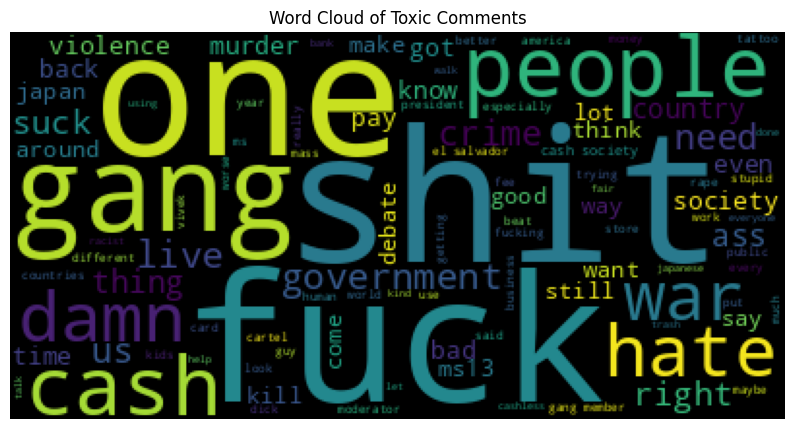

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df.dropna(subset=['Comments'], inplace=True)

toxic_comments = df[df['Labels'] == 1]['Comments']

toxic_text = " ".join(comment for comment in toxic_comments)

wordcloud_toxic = WordCloud(background_color='black', max_words=100, contour_width=3, contour_color='red')

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_toxic.generate(toxic_text))
plt.axis("off")
plt.title('Word Cloud of Toxic Comments')
plt.show()


Label Distribution

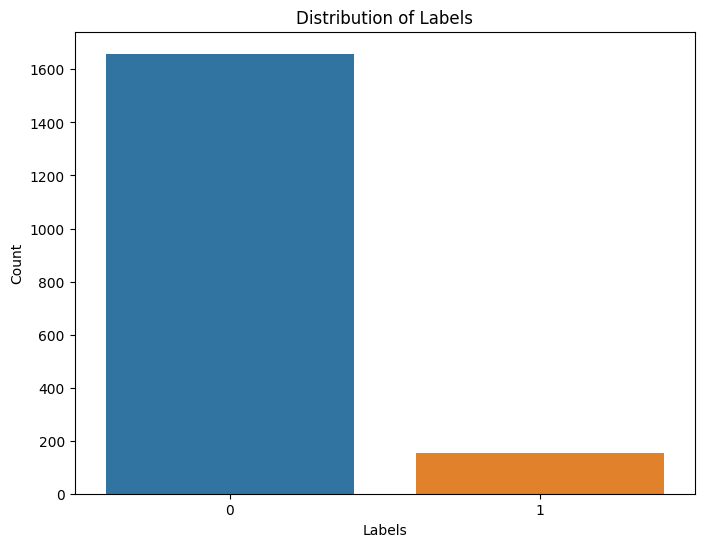

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Labels', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


Length of comments in characters

In [ ]:
import pandas as pd
import plotly.express as px
df['Comment_Length'] = df['Comments'].str.len()



In [ ]:
fig = px.histogram(df, x=df['Comment_Length'], nbins=50, title='Distribution of Comment Lengths')
fig.show()


# Machine Learning






In [ ]:
comments = df['Comments']
labels = df['Labels']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

Naive bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

report_nb = classification_report(y_test, y_pred_nb)

print(report_nb)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       337
           1       0.50      0.50      0.50        26

    accuracy                           0.93       363
   macro avg       0.73      0.73      0.73       363
weighted avg       0.93      0.93      0.93       363



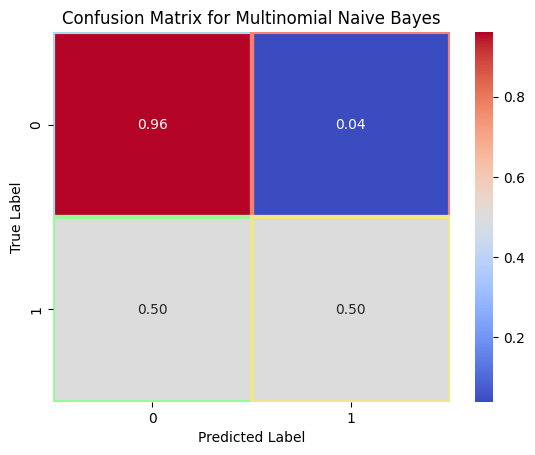

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm_normalized = confusion_matrix(y_test, y_pred_nb, normalize='true')

fig, ax = plt.subplots()
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

ax.set_title('Confusion Matrix for Multinomial Naive Bayes')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Color each cell with a unique color
colors = ["lightblue", "salmon", "palegreen", "khaki"]
for i in range(len(colors)):
    ax.add_patch(plt.Rectangle((i % 2, i // 2), 1, 1, fill=False, edgecolor=colors[i], lw=3))

plt.show()

In [ ]:
# testing data

sample_comment = "This is a sample comment! It contains offensive language."

sample_comment_vectorized = vectorizer.transform([sample_comment])

prediction = nb_model.predict(sample_comment_vectorized)

# Print the prediction
if prediction == 1:
    print("The model predicts that the comment is toxic.")
else:
    print("The model predicts that the comment is not toxic.")

The model predicts that the comment is not toxic.


SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

report_svm = classification_report(y_test, y_pred_svm)

print(report_svm)


              precision    recall  f1-score   support

           0       0.93      1.00      0.97       337
           1       1.00      0.08      0.14        26

    accuracy                           0.93       363
   macro avg       0.97      0.54      0.55       363
weighted avg       0.94      0.93      0.91       363



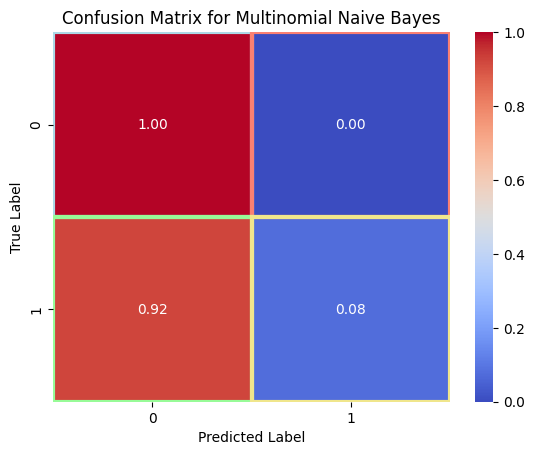

In [ ]:
cm_normalized = confusion_matrix(y_test, y_pred_svm, normalize='true')

fig, ax = plt.subplots()
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

ax.set_title('Confusion Matrix for Multinomial Naive Bayes')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Color each cell with a unique color
colors = ["lightblue", "salmon", "palegreen", "khaki"]
for i in range(len(colors)):
    ax.add_patch(plt.Rectangle((i % 2, i // 2), 1, 1, fill=False, edgecolor=colors[i], lw=3))

plt.show()

In [ ]:
sample_toxic_comment = "fuck uou"
sample_comment_vectorized = vectorizer.transform([sample_toxic_comment])

prediction = svm_model.predict(sample_comment_vectorized)

# Print the prediction
if prediction == 1:
    print("The SVM model predicts that the comment is toxic.")
else:
    print("The SVM model predicts that the comment is not toxic.")

The SVM model predicts that the comment is toxic.


# Deep Learning

In [ ]:
comments = df['Comments'].tolist()
labels = df['Labels'].tolist()

LSTM

In [ ]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)
padded_sequences = pad_sequences(sequences, maxlen=200)


X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))


lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

=
y_train = np.array(y_train)
y_test = np.array(y_test)

lstm_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
46/46 [==============================] - 12s 201ms/step - loss: 0.3819 - accuracy: 0.8999 - val_loss: 0.2548 - val_accuracy: 0.9284
Epoch 2/10
46/46 [==============================] - 7s 155ms/step - loss: 0.2778 - accuracy: 0.9130 - val_loss: 0.2328 - val_accuracy: 0.9284
Epoch 3/10
46/46 [==============================] - 9s 194ms/step - loss: 0.1868 - accuracy: 0.9275 - val_loss: 0.1785 - val_accuracy: 0.9256
Epoch 4/10
46/46 [==============================] - 7s 154ms/step - loss: 0.0588 - accuracy: 0.9827 - val_loss: 0.1568 - val_accuracy: 0.9394
Epoch 5/10
46/46 [==============================] - 9s 191ms/step - loss: 0.0204 - accuracy: 0.9979 - val_loss: 0.1482 - val_accuracy: 0.9504
Epoch 6/10
46/46 [==============================] - 8s 175ms/step - loss: 0.0084 - accuracy: 0.9993 - val_loss: 0.1658 - val_accuracy: 0.9449
Epoch 7/10
46/46 [==============================] - 8s 172ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1512 - val_accuracy: 0.9587
Epoch

In [ ]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

12/12 [==============================] - 1s 58ms/step - loss: 0.2127 - accuracy: 0.9421
Test Loss: 0.21269646286964417
Test Accuracy: 0.942148745059967


In [ ]:
y_pred = lstm_model.predict(X_test)

y_pred = (y_pred > 0.5).astype('int32')

12/12 [==============================] - 1s 56ms/step


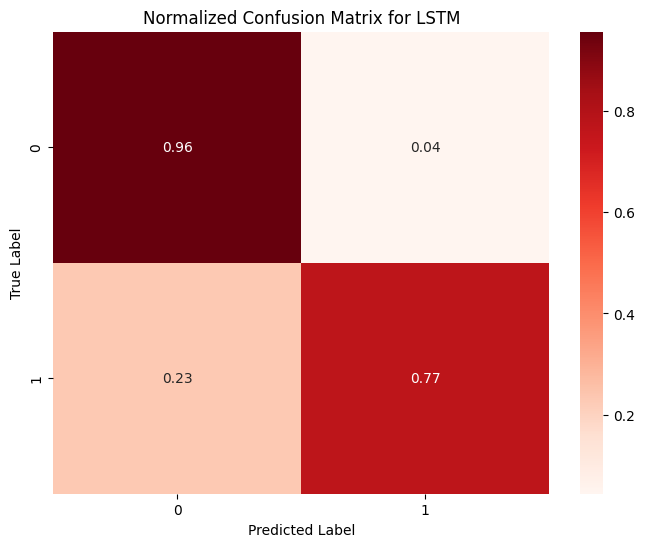

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for LSTM')
plt.show()


In [ ]:
sample_toxic_comment = "This is an offensive and toxic comment."

sample_sequence = tokenizer.texts_to_sequences([sample_toxic_comment])

padded_sample_sequence = pad_sequences(sample_sequence, maxlen=200)

prediction = lstm_model.predict(padded_sample_sequence)

threshold = 0.5
binary_prediction = 1 if prediction > threshold else 0

print("Raw Prediction:", prediction)
print("Binary Prediction:", binary_prediction)

1/1 [==============================] - 0s 71ms/step
Raw Prediction: [[0.00047371]]
Binary Prediction: 0


CNN

In [ ]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)
padded_sequences = pad_sequences(sequences, maxlen=200)

y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
cnn_model.add(Conv1D(64, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/10
46/46 [==============================] - 4s 57ms/step - loss: 0.3821 - accuracy: 0.9102 - val_loss: 0.2596 - val_accuracy: 0.9284
Epoch 2/10
46/46 [==============================] - 2s 54ms/step - loss: 0.2833 - accuracy: 0.9130 - val_loss: 0.2533 - val_accuracy: 0.9284
Epoch 3/10
46/46 [==============================] - 3s 56ms/step - loss: 0.2489 - accuracy: 0.9130 - val_loss: 0.2241 - val_accuracy: 0.9284
Epoch 4/10
46/46 [==============================] - 4s 77ms/step - loss: 0.1445 - accuracy: 0.9413 - val_loss: 0.1443 - val_accuracy: 0.9532
Epoch 5/10
46/46 [==============================] - 3s 72ms/step - loss: 0.0516 - accuracy: 0.9917 - val_loss: 0.1000 - val_accuracy: 0.9752
Epoch 6/10
46/46 [==============================] - 2s 52ms/step - loss: 0.0120 - accuracy: 0.9986 - val_loss: 0.0908 - val_accuracy: 0.9752
Epoch 7/10
46/46 [==============================] - 2s 53ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.1022 - val_accuracy: 0.9725
Epoch 8/10
46

In [ ]:
y_pred_cnn= cnn_model.predict(X_test)

y_pred_cnn = (y_pred_cnn > 0.5).astype('int32')

12/12 [==============================] - 0s 21ms/step


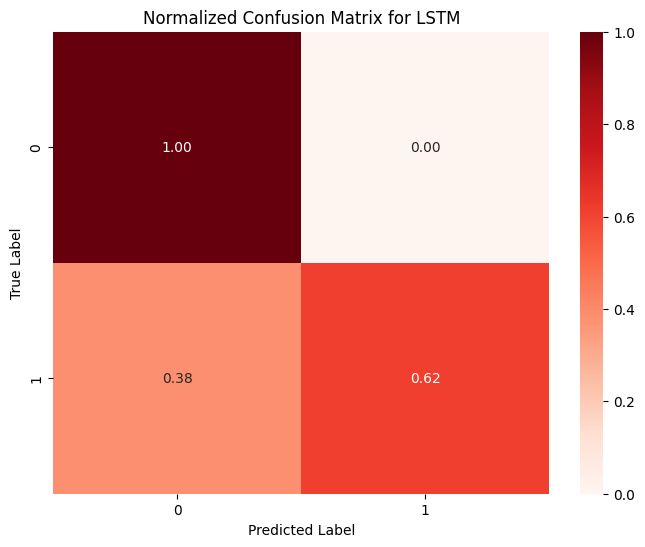

In [ ]:
cm = confusion_matrix(y_test, y_pred_cnn)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for LSTM')
plt.show()

In [ ]:
sample_toxic_comment = "This is an offensive and toxic comment."

sample_sequence = tokenizer.texts_to_sequences([sample_toxic_comment])

padded_sample_sequence = pad_sequences(sample_sequence, maxlen=200)

prediction = cnn_model.predict(padded_sample_sequence)

threshold = 0.5
binary_prediction = 1 if prediction > threshold else 0

print("Raw Prediction:", prediction)
print("Binary Prediction:", binary_prediction)


1/1 [==============================] - 0s 31ms/step
Raw Prediction: [[0.00078547]]
Binary Prediction: 0
